# Visualization of images with multi digits randomly placed on a canvas

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import src
from src.Dataset import Dataset

In [4]:
import importlib
importlib.reload(src.Dataset)
from src.Dataset import Dataset

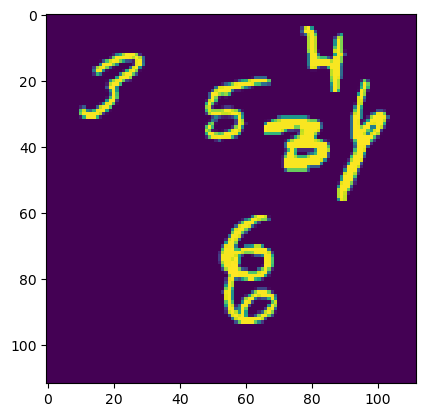

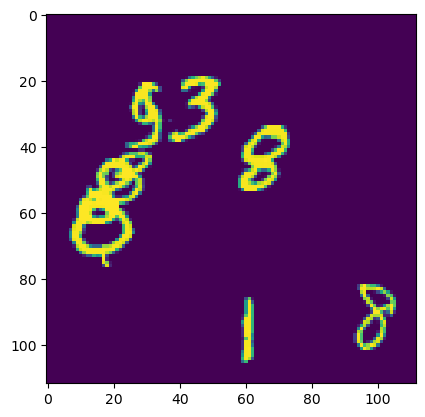

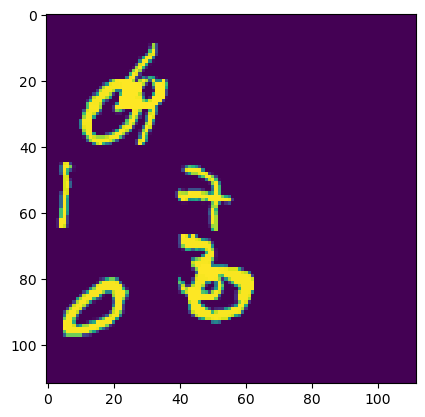

In [5]:
dataset = Dataset()
multi_digits_randomly_placed_images = \
    dataset.generate_multi_digits_randomly_placed(
        n_images=3, n_digits_in_img=8, img_shape=(112, 112))
for img in multi_digits_randomly_placed_images:
    plt.imshow(img)
    plt.show()